## import train and test data for Classification

**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [69]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [70]:
plt.style.use('classic')
random.seed(42)

In [71]:

C_train = pd.read_csv("df3_C_train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("df3_C_test.csv",index_col="Unnamed: 0")

In [72]:
C_train.isna().sum()

scongested    0
iyoy          1
dtype: int64

## Drop nan for classification Data

In [73]:
C_train =C_train.dropna()

In [74]:
C_train.head()

,scongested,iyoy
1,0,0.105477
2,0,0.074368
3,0,0.066034
4,1,0.208247
5,1,0.052101


In [75]:
C_test.isna().sum()

scongested    0
iyoy          0
dtype: int64

## import train and test data for Regression

In [76]:

R_train = pd.read_csv("df3_R_train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("df3_R_test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [77]:
R_train.isna().sum()

syoy    1
iyoy    1
dtype: int64

In [78]:
R_train=R_train.dropna()

In [79]:
R_test.isna().sum()

syoy    0
iyoy    0
dtype: int64

In [80]:
R_train.head()

,syoy,iyoy
1,-1.726983,0.105477
2,-0.149997,0.074368
3,-0.885127,0.066034
4,1.687325,0.208247
5,0.693305,0.052101


In [81]:
R_test.head()

,syoy,iyoy
35,-1.465948,-0.367052
36,-1.047838,-0.636539
37,0.171117,-0.206509
38,-0.190077,0.344773
39,-0.960884,-0.383187


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [82]:
C_train.head()

,scongested,iyoy
1,0,0.105477
2,0,0.074368
3,0,0.066034
4,1,0.208247
5,1,0.052101


In [83]:
x_train = pd.DataFrame(np.array(C_train['iyoy']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['scongested'].astype(int))

In [84]:
C_test.head()

,scongested,iyoy
35,0,-0.367052
36,0,-0.636539
37,1,-0.206509
38,0,0.344773
39,0,-0.383187


In [85]:
x_test = pd.DataFrame(np.array(C_test['iyoy']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['scongested'].astype(int))

## Import base packages

In [86]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
mdl = DecisionTreeClassifier().fit(x_train, y_train)

## Result

In [89]:
y_pred= mdl.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1])

## Evaluations

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



/home/suny/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


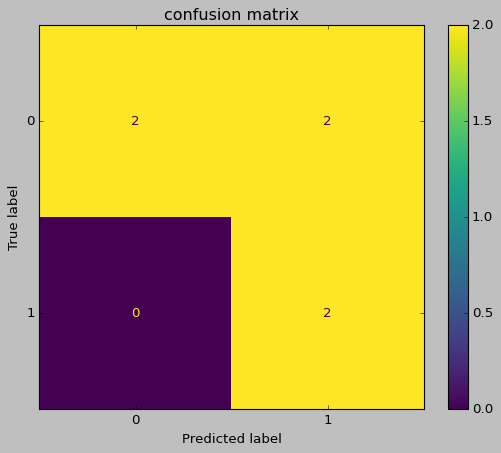

In [91]:
plot_confusion_matrix(mdl, x_test, y_test)
plt.title('confusion matrix')
plt.show()

/home/suny/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


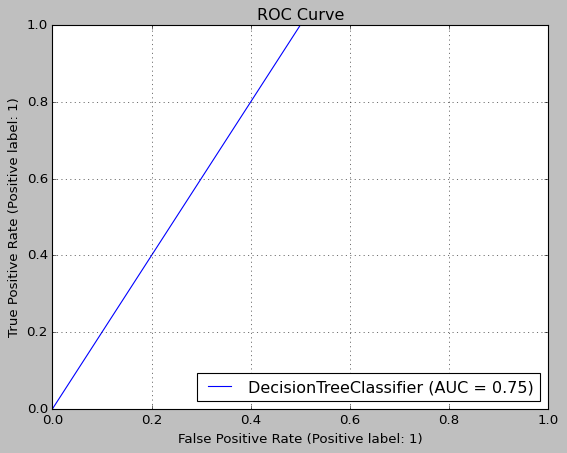

In [92]:
plot_roc_curve(mdl, x_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
mdl = RandomForestClassifier().fit(x_train, y_train)

/tmp/ipykernel_6009/1062492093.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(x_train, y_train)


In [95]:
print(classification_report(y_test, mdl.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



/home/suny/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


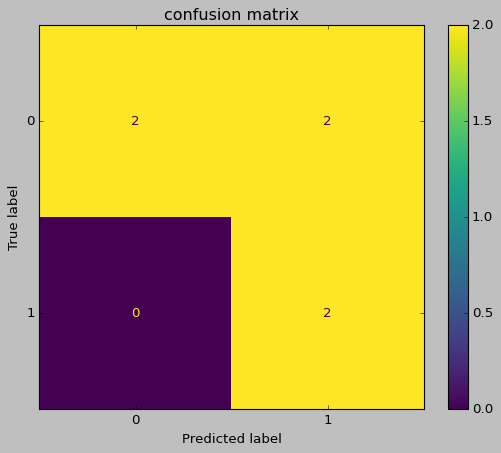

In [96]:
plot_confusion_matrix(mdl, x_test, y_test)
plt.title('confusion matrix')
plt.show()

/home/suny/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


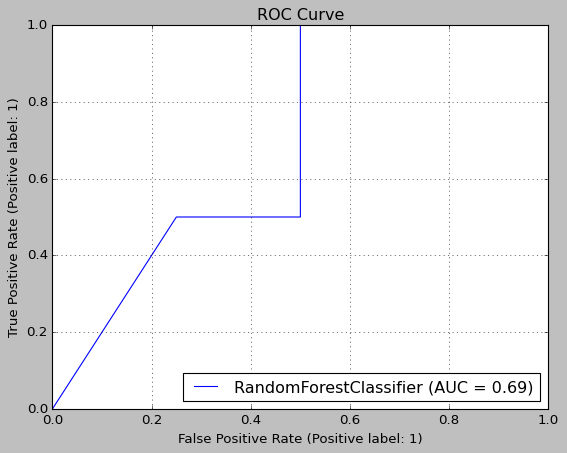

In [97]:
plot_roc_curve(mdl, x_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [98]:
from sklearn.neural_network import MLPClassifier

In [99]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(x_train, y_train)

/home/suny/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
print(classification_report(y_test, mdl.predict(x_test)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



/home/suny/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


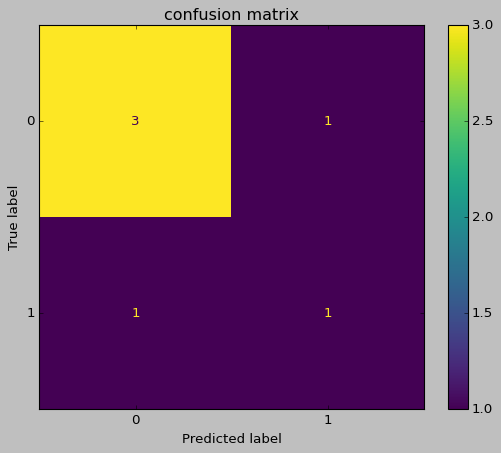

In [101]:
plot_confusion_matrix(mdl, x_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [102]:
# !pip install autogluon

In [103]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [104]:
train_df = pd.DataFrame(x_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(x_test)
test_df['target'] = y_test.values

In [105]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [106]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #27-Ubuntu SMP PREEMPT_DYNAMIC Wed Nov 23 20:44:15 UTC 2022
Train Data Rows:    34
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    14506.87 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferring data type

In [107]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [108]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

,model,score_test,accuracy,precision,recall,f1,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,0.833333,0.833333,0.666667,1.0,0.800000,0.714286,0.005564,0.025411,0.016036,0.005564,0.025411,0.016036,1,True,2
1,NeuralNetTorch,0.833333,0.833333,0.666667,1.0,0.800000,0.571429,0.022296,0.009413,0.824523,0.022296,0.009413,0.824523,1,True,12
2,CatBoost,0.666667,0.666667,0.500000,0.5,0.500000,0.714286,0.007601,0.011801,0.441560,0.007601,0.011801,0.441560,1,True,7
3,KNeighborsUnif,0.666667,0.666667,0.500000,0.5,0.500000,0.714286,0.008955,0.017835,0.016486,0.008955,0.017835,0.016486,1,True,1
4,WeightedEnsemble_L2,0.666667,0.666667,0.500000,0.5,0.500000,0.714286,0.011455,0.018583,0.529079,0.002500,0.000748,0.512593,2,True,14
5,XGBoost,0.666667,0.666667,0.500000,0.5,0.500000,0.714286,0.048571,0.006306,0.225610,0.048571,0.006306,0.225610,1,True,11
6,RandomForestEntr,0.666667,0.666667,0.500000,1.0,0.666667,0.428571,0.069127,0.073150,1.082556,0.069127,0.073150,1.082556,1,True,6
7,RandomForestGini,0.666667,0.666667,0.500000,1.0,0.666667,0.428571,0.072415,0.116381,1.175136,0.072415,0.116381,1.175136,1,True,5
8,ExtraTreesEntr,0.666667,0.666667,0.500000,1.0,0.666667,0.571429,0.074413,0.152969,0.944077,0.074413,0.152969,0.944077,1,True,9
9,ExtraTreesGini,0.666667,0.666667,0.500000,1.0,0.666667,0.571429,0.075419,0.118058,1.324081,0.075419,0.118058,1.324081,1,True,8


# Machine Learning Regression

## important global packages

In [109]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [110]:
R_train.head()

,syoy,iyoy
1,-1.726983,0.105477
2,-0.149997,0.074368
3,-0.885127,0.066034
4,1.687325,0.208247
5,0.693305,0.052101


In [111]:
x_train = pd.DataFrame(R_train['iyoy'])
y_train = pd.DataFrame(R_train['syoy'])

In [112]:
R_test.head()

,syoy,iyoy
35,-1.465948,-0.367052
36,-1.047838,-0.636539
37,0.171117,-0.206509
38,-0.190077,0.344773
39,-0.960884,-0.383187


In [113]:
x_test = pd.DataFrame(R_test['iyoy'])
y_test = pd.DataFrame(R_test['syoy'])

## Linear Regression

In [114]:
from sklearn import linear_model

In [115]:
mdl = linear_model.LinearRegression().fit(x_train,y_train)

In [116]:
r2 = r2_score(y_test, mdl.predict(x_test))
print(f'R2 Score: {r2}')


R2 Score: -0.43581102908671765


In [117]:
y_pred = pd.DataFrame(np.array(mdl.predict(x_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,0.077103
1,-0.094239
2,0.179177
3,0.529685
4,0.066845
5,0.572724


/tmp/ipykernel_6009/3084031857.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


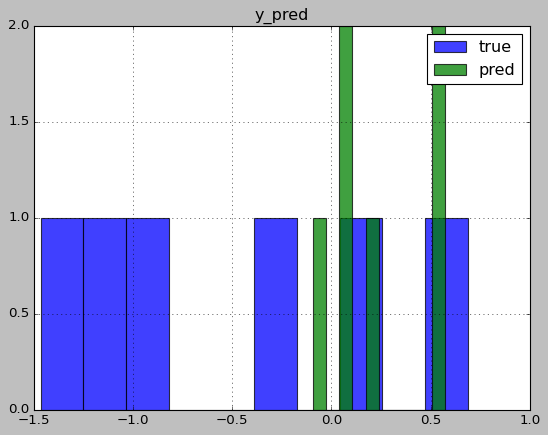

In [118]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
mdl = RandomForestRegressor().fit(x_train, y_train)

/tmp/ipykernel_6009/3871567223.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(x_train, y_train)


In [121]:
# calculate R2
from sklearn.metrics import r2_score

In [122]:
r2 = r2_score(y_test, mdl.predict(x_test))
print(f'R2 Score: {r2}')


R2 Score: -0.4321313362595267


In [123]:
y_pred = pd.DataFrame(np.array(mdl.predict(x_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,-1.065102
1,0.189788
2,-0.220380
3,1.394652
4,-1.057434
5,1.394652


/tmp/ipykernel_6009/3084031857.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


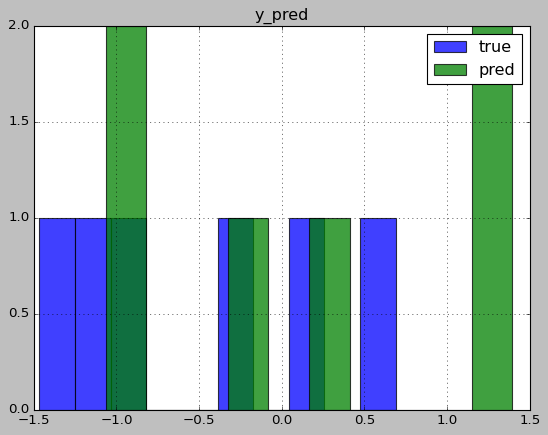

In [124]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Auto-ML

In [125]:
train_df = pd.DataFrame(x_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(x_test)
test_df['target'] = y_test.values

In [126]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [127]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.0
Python Version:     3.9.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #27-Ubuntu SMP PREEMPT_DYNAMIC Wed Nov 23 20:44:15 UTC 2022
Train Data Rows:    34
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (2.961447839999998, -2.1676806799999966, 0.35778, 1.38777)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    14520.4 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0%

In [128]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [129]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

,model,score_test,root_mean_squared_error,mean_squared_error,mean_absolute_error,median_absolute_error,r2,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsUnif,-0.647693,-0.647693,-0.419507,-0.511404,-0.344397,0.259128,-0.893463,0.007123,0.020231,0.008941,0.007123,0.020231,0.008941,1,True,1
1,WeightedEnsemble_L2,-0.647693,-0.647693,-0.419507,-0.511404,-0.344397,0.259128,-0.893463,0.011132,0.020964,0.653166,0.004009,0.000733,0.644225,2,True,12
2,LightGBMLarge,-0.670373,-0.670373,-0.449400,-0.586427,-0.494893,0.206334,-1.010268,0.037737,0.001568,0.316115,0.037737,0.001568,0.316115,1,True,11
3,KNeighborsDist,-0.707727,-0.707727,-0.500877,-0.580550,-0.508119,0.115424,-1.551487,0.006835,0.010546,0.019240,0.006835,0.010546,0.019240,1,True,2
4,CatBoost,-0.729981,-0.729981,-0.532873,-0.609518,-0.610313,0.058917,-1.062197,0.002606,0.001968,0.365622,0.002606,0.001968,0.365622,1,True,6
5,ExtraTreesMSE,-0.879403,-0.879403,-0.773350,-0.720852,-0.603522,-0.365780,-1.236576,0.070068,0.066614,0.984782,0.070068,0.066614,0.984782,1,True,7
6,RandomForestMSE,-0.917058,-0.917058,-0.840996,-0.732099,-0.548509,-0.485246,-1.254242,0.096012,0.044147,1.130419,0.096012,0.044147,1.130419,1,True,5
7,XGBoost,-0.940118,-0.940118,-0.883821,-0.849646,-0.963081,-0.560878,-1.186664,0.092626,0.006455,0.291616,0.092626,0.006455,0.291616,1,True,9
8,NeuralNetTorch,-1.010299,-1.010299,-1.020703,-0.854357,-1.081545,-0.802619,-1.219534,0.023148,0.013374,0.601067,0.023148,0.013374,0.601067,1,True,10
9,LightGBM,-1.061929,-1.061929,-1.127693,-0.884776,-0.857203,-0.991568,-1.398336,0.017634,0.001848,0.428624,0.017634,0.001848,0.428624,1,True,4


In [130]:
r2 = r2_score(y_test,
              predictor.predict(
                  x_test)
              )
print(f'R2 Score: {r2}')

R2 Score: 0.2591276024045954


In [131]:
y_pred = predictor.predict(x_test)
y_pred

35   -0.773710
36   -0.790076
37   -0.019862
38    1.119164
39   -0.773710
40    1.119164
Name: target, dtype: float32

/tmp/ipykernel_6009/3084031857.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


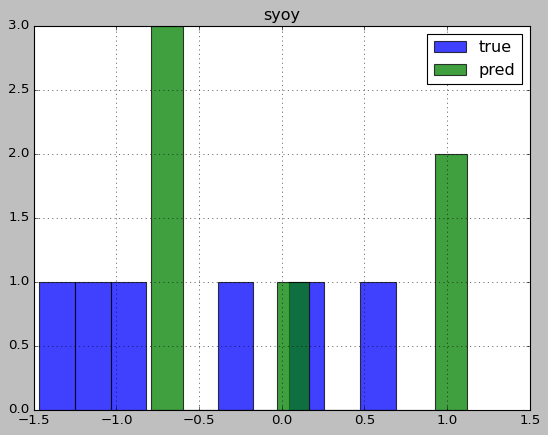

In [132]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
